# NAME : ANAK AGUNG NGURAH TATA PINANDHIKA
   ## EMAIL : agungtata89@gmail.com

# Background
Currently there are a lot of new films that we can watch easily because of the increasingly rapid development of the era. And with this convenience, many film industries are competing to make the latest films every year. And with so many new film titles on the market, as a data analyst, I try to help directors determine the criteria or correlation between the Metascore value and the popularity of a film, so that it can be used as a reference for future marketing and production techniques.

## Importing library from requirement.txt

In [91]:
#importing required Libraries
import pandas as pd   #to create dataframe
import requests       #to send the request to the URL
from bs4 import BeautifulSoup #to get the content in the form of HTML
import numpy as np  # to count the values (in our case)

## describe link you can scrapping

- use requests and get 
- use 'html.parser'

In [92]:

url = 'https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: Tag, NavigableString, BeautifulSoup, and Comment. But at this module we will only use BeautifulSoup.

In [93]:
response

<Response [200]>

## create empy list for placed your list

In [94]:
#creating an empty list,
movie_title = []
metascore = []
rating = []
votes = []

## Define the key from the your website can be scrapping

<img src='\kelas data science\capstone\capstone web scrapping\sources'>

In [95]:
data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

From inspect element we know that we need to find the line table with class `lister-item mode-advanced`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

## let's scrapping
define the location your data can be srapping, you can do it by click the right your cursor at the data you can get.

In [96]:
for store in data:
    title = store.h3.a.text
    movie_title.append(title)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '0'
    metascore.append(meta)
    #since, gross and votes have same attributes, that's why we had created a common variable and then used indexing
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text.replace(',', '')
    votes.append(vote)
    

## creating dataframe

In [134]:
#creating a dataframe using pandas library
movie = pd.DataFrame({'Title of movie': movie_title,'Movie Rating': rating, 'Metascore': metascore, 'votes':votes})

## wrangling and visualization

- yang pertama saya membuat sebuah dataframe baru bernama 'favorit', yang berisikan top-7 dari data 'movie'
- lalu langkah berikutnya adalah merubah type file, yaiut 'Movie Rating' menjadi float64, sedangkan 'Metascore' dan votes menjadi int64.
- langkah berikutnya adalah membuat membuat dataframe baru bernama 'favorit1' yang merubah 'Title of movie' menjadi index, agar mudah saat dilakukan ploting
- dan langkah terakhir adalah membuat floating, dengan mengambil data 'Metascore', dan di plot kedalam bar plot karena ingin melihat perbedaan nilai metascore dari ke-7 film paling popular tersebut

In [170]:
favorit=movie.head(7)
favorit

,Title of movie,Movie Rating,Metascore,votes
0,CODA,8.1,74,89246
1,The Power of the Dog,6.9,89,148963
2,King Richard,7.5,76,79699
3,Dune: Part One,8.1,74,536611
4,The Eyes of Tammy Faye,6.6,55,23023
5,Spider-Man: No Way Home,8.5,71,575058
6,West Side Story,7.3,85,64255


In [150]:
movie.dtypes

Title of movie     object
Movie Rating      float64
Metascore           int64
votes               int64
dtype: object

In [147]:
movie['Movie Rating']=movie['Movie Rating'].astype('float64')

In [148]:
movie['Metascore']=movie['Metascore'].astype('int64')

In [149]:
movie['votes']=movie['votes'].astype('int64')

In [163]:
favorit1=favorit.set_index('Title of movie', drop=True)

In [175]:
favorit1

,Movie Rating,Metascore,votes
Title of movie,,,
CODA,8.1,74,89246
The Power of the Dog,6.9,89,148963
King Richard,7.5,76,79699
Dune: Part One,8.1,74,536611
The Eyes of Tammy Faye,6.6,55,23023
Spider-Man: No Way Home,8.5,71,575058
West Side Story,7.3,85,64255


In [174]:
favorit1['Metascore'].mean()

74.85714285714286

<AxesSubplot:title={'center':'seven most popular movie in 2021'}, xlabel='Title of movie', ylabel='Metascore'>

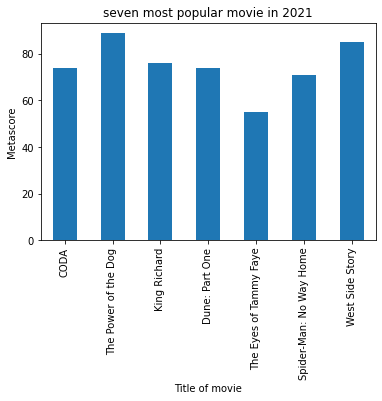

In [166]:
favorit1['Metascore'].plot.bar(title = 'seven most popular movie in 2021',
                xlabel = 'Title of movie',
                ylabel = 'Metascore')

# insight
- Tidak terjadi korelasi yang positif diantara nilai metascore dari sebuah film terhadap sebuah popularitasnya.
- nilai metascore yang terbesar dari ke-7 film tersebut adalah dimiliki oleh "the power of the dog"
- nilai rata-rata dari metascore ke-7 film tersebut adalah 74,85, dimana nilai tersebut dibawah dari nilai metascore dari film berjudul 'CODA' yang menempati posisi pertama secara popularitas.